**IMPORT AND MOUNT DRIVE**

In [237]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMPORT THE NECESSARY LIBRARIES**

In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


**LOAD DATA**

In [239]:
# Load stock price data
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Google_Stock_Price_Train.csv')
data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


**SELECT THE COLUMNS TO TRAIN THE MODEL**

In [240]:
#For training set, we are onyl using open and close columns
trainset = data.iloc[:,1:2].values
trainset


array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

**SCALE THE SELECTED COLUMNS/FEATURES**

In [241]:
#Here we scale our features to to remove data variance and get a range we can use with the machine
#So we range the data within 0 and 1 using the MinMaxScaler and using the sklearn library
from sklearn.preprocessing import MinMaxScaler
scaled_data = MinMaxScaler(feature_range = (0,1))
training_scaled = scaled_data.fit_transform(trainset)
training_scaled


array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

**CREATE EMPTY ARRAYS TO STORE OUR DATA FOR TRAINING**

In [242]:
#Empty array to store the data
x_train = []
y_train = []

In [243]:
#Creating a data structure with 60 timesteps and 1 output
for i in range (60, 1258):
  x_train.append(training_scaled[i-60:i,0])
  y_train.append(training_scaled[i,0])
x_train, y_train = np.array(x_train),np.array(y_train)

In [244]:
#Display the size of our independent training dataset
x_train.shape



(1198, 60)

**RESHAPE OUR ARRAY TO ALLOW US TO ADD OR REMOVE ELEMENTS**

In [245]:
#Reshape the array to change its shape which allows us to add or remove elements
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

**CREATE OUR RNN MODEL USING KERAS**

In [246]:
#In our case we will be using LSTM (Long Short term Memory) model for RNN
#For layers, we will use Sequential, Dense and Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [247]:
#Initializing RNN and adding the first LSTM layer and some Dropout regulation
regressor = Sequential ()  #First we need to initialize our RNN model
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))

In [248]:
#Here we use droput regularisation method to reduce over fitting and improve the model performace
regressor.add(Dropout(0.2))

In [249]:
#Adding a second LSTM layer and some dropout regularisation
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [250]:
#Adding a third LSTM layer some Dropout regularisation
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [251]:
#Adding a fourth LSTM layer some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [252]:
#Now we can add the Dense layer. This is a fully connect layer in the neural network
regressor.add(Dense(units = 1))

**COMPILING OUR MODEL OR REGRESSOR AND OPTIMIZING IT USING ADAM**

In [253]:
#Using adam as our optimizer and for loss we will mean squared error.
#We are using adam because its algorithm for optimzations technique for the  gradient descent and its
#Adam is also light, easy to run in our environment.
#We use mean squared error to calculte losses. This loss function will compute the how much loss we have minimused per every time of training the model

regressor.compile(optimizer='adam',loss='mean_squared_error')




**FITTING OUR RNN MODEL INTO THE TRAINING SET**

In [254]:
regressor.fit(x_train, y_train, epochs=50, batch_size = 32)

Epoch 1/50
38/38 [==============================] - 14s 122ms/step - loss: 0.0351
Epoch 2/50
38/38 [==============================] - 5s 139ms/step - loss: 0.0077
Epoch 3/50
38/38 [==============================] - 7s 180ms/step - loss: 0.0062
Epoch 4/50
38/38 [==============================] - 4s 118ms/step - loss: 0.0054
Epoch 5/50
38/38 [==============================] - 5s 120ms/step - loss: 0.0059
Epoch 6/50
38/38 [==============================] - 8s 199ms/step - loss: 0.0059
Epoch 7/50
38/38 [==============================] - 5s 119ms/step - loss: 0.0053
Epoch 8/50
38/38 [==============================] - 5s 120ms/step - loss: 0.0056
Epoch 9/50
38/38 [==============================] - 7s 185ms/step - loss: 0.0067
Epoch 10/50
38/38 [==============================] - 5s 134ms/step - loss: 0.0044
Epoch 11/50
38/38 [==============================] - 4s 118ms/step - loss: 0.0043
Epoch 12/50
38/38 [==============================] - 9s 241ms/step - loss: 0.0041
Epoch 13/50
38/38 [=====

**MAKING PREDICTION AND DISPLAYING THE RESULTS VISUALLY**

In [255]:
#Load our test data
dataset_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Google_Stock_Price_Test.csv')


In [256]:
#Real Stock Price
real_stock_price = dataset_test.iloc[:, 1:2].values


**CONCATINATE THE TRAINING AND TESTING DATA OR VALUES**

In [257]:
#Here we have put the data set for training and testing together to have the total values
dataset_total = pd.concat((data['Open'], dataset_test['Open']),axis =0)
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [258]:
#Check the length of the input we need after removing the 60 values sets from the training
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [259]:
#reshaping the input data again
inputs = inputs.reshape(-1,1)
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

**EXPLORATORY DATA ANALYSIS PART AND TRANSFORMATION**

In [260]:
# Data Transformation
inputs = scaled_data.transform(inputs)
inputs.shape

(80, 1)

In [261]:
x_test = []
for i in range(60, 80):
    x_test.append(inputs[i-60:i, 0])



In [262]:
x_test = np.array(x_test)
x_test.shape

(20, 60)

In [263]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [264]:
predicted_price = regressor.predict(x_test)


1/1 [==============================] - 2s 2s/step


In [265]:
# Predicted Price
predicted_price = regressor.predict(x_test)
predicted_price = scaled_data.inverse_transform(predicted_price)


1/1 [==============================] - 0s 44ms/step


**PLOT THE REAL PRICE AND THE PREDICTED PRICE**

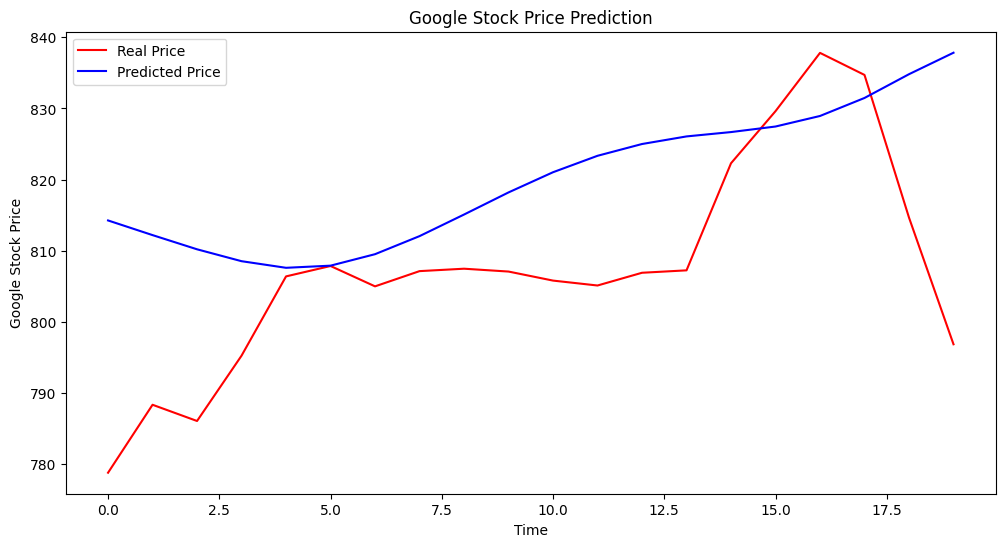

In [266]:
# Set the offset value
offset_value =35

plt.figure(figsize=(12, 6))
plt.plot(real_stock_price, color='red', label='Real Price')
plt.plot(predicted_price + offset_value, color='blue', label='Predicted Price')  # Adding an offset
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()

# Adjusting y-axis limits for better visualization
y_min = min(np.min(real_stock_price), np.min(predicted_price + offset_value))
y_max = max(np.max(real_stock_price), np.max(predicted_price + offset_value))
y_margin = 0.05 * (y_max - y_min)
plt.ylim([y_min - y_margin, y_max + y_margin])

plt.show()



In [267]:
regressor.save('/content/drive/My Drive/Colab Notebooks/google_stock_prediction_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
